In [2]:
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers

In [3]:
RESOLUTION = 150
BATCH_SIZE = 128

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
        '../input/the-simpsons-dataset/the-simpsons-dataset/top-10/',
        target_size=(RESOLUTION, RESOLUTION),
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        '../input/the-simpsons-dataset/the-simpsons-dataset/top-10/',
        target_size=(RESOLUTION, RESOLUTION),
        class_mode='categorical', subset="validation")

Found 11745 images belonging to 10 classes.
Found 2066 images belonging to 10 classes.


In [4]:
train_generator.class_indices

{'bart_simpson': 0,
 'charles_montgomery_burns': 1,
 'homer_simpson': 2,
 'krusty_the_clown': 3,
 'lisa_simpson': 4,
 'marge_simpson': 5,
 'milhouse_van_houten': 6,
 'moe_szyslak': 7,
 'ned_flanders': 8,
 'principal_skinner': 9}

In [5]:
def create_model(dropout=False, p=0.0):    
    model = Sequential()
    model.add(layers.Conv2D(filters=100, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.Conv2D(filters=100, kernel_size=(5, 5), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    
    if dropout:
        model.add(Dropout(p))
    
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    return model

In [6]:
probs = [0.1, 0.3, 0.5]
history_report = []

In [7]:
N_TRAIN = 11745
N_VAL = 2066

for p_ in probs:
    opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model = create_model(dropout=True, p=p_)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit_generator(
    train_generator,
    steps_per_epoch=(N_TRAIN // BATCH_SIZE),
    epochs=50,
    validation_data=val_generator,
    validation_steps=(N_VAL // BATCH_SIZE) 
    )

    history_report.append(history)

Epoch 1/50
91/91 [==============================] - 43s 474ms/step - loss: 14.3096 - acc: 0.1037 - val_loss: 14.7644 - val_acc: 0.0840
Epoch 2/50
91/91 [==============================] - 37s 403ms/step - loss: 14.6900 - acc: 0.0886 - val_loss: 14.2922 - val_acc: 0.1133
Epoch 3/50
91/91 [==============================] - 37s 402ms/step - loss: 14.4631 - acc: 0.1027 - val_loss: 14.6385 - val_acc: 0.0918
Epoch 4/50
91/91 [==============================] - 37s 402ms/step - loss: 14.5295 - acc: 0.0986 - val_loss: 14.4496 - val_acc: 0.1035
Epoch 5/50
91/91 [==============================] - 37s 411ms/step - loss: 14.5626 - acc: 0.0965 - val_loss: 14.4027 - val_acc: 0.1064
Epoch 6/50
91/91 [==============================] - 37s 401ms/step - loss: 14.6458 - acc: 0.0913 - val_loss: 14.3867 - val_acc: 0.1074
Epoch 7/50
91/91 [==============================] - 37s 402ms/step - loss: 14.5129 - acc: 0.0996 - val_loss: 14.6385 - val_acc: 0.0918
Epoch 8/50
91/91 [==============================] - 37s

91/91 [==============================] - 37s 402ms/step - loss: 14.7620 - acc: 0.0841 - val_loss: 14.6616 - val_acc: 0.0904
Epoch 22/50
91/91 [==============================] - 36s 399ms/step - loss: 14.7951 - acc: 0.0821 - val_loss: 14.8274 - val_acc: 0.0801
Epoch 23/50
91/91 [==============================] - 37s 402ms/step - loss: 14.8948 - acc: 0.0759 - val_loss: 14.8589 - val_acc: 0.0781
Epoch 24/50
91/91 [==============================] - 37s 402ms/step - loss: 14.8395 - acc: 0.0793 - val_loss: 14.8589 - val_acc: 0.0781
Epoch 25/50
91/91 [==============================] - 37s 402ms/step - loss: 14.9170 - acc: 0.0745 - val_loss: 14.9218 - val_acc: 0.0742
Epoch 26/50
91/91 [==============================] - 36s 398ms/step - loss: 14.9113 - acc: 0.0749 - val_loss: 14.8235 - val_acc: 0.0803
Epoch 27/50
91/91 [==============================] - 37s 402ms/step - loss: 14.9115 - acc: 0.0749 - val_loss: 14.6700 - val_acc: 0.0898
Epoch 28/50
91/91 [==============================] - 37s 402

# Questão 2d.

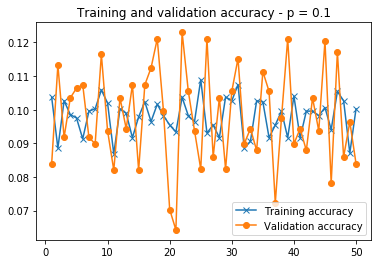

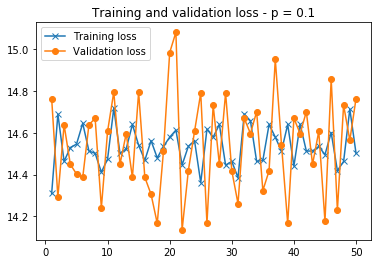

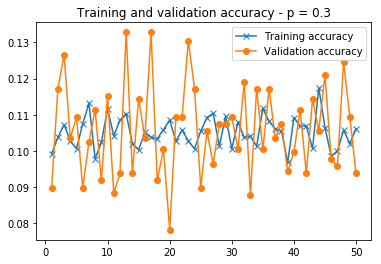

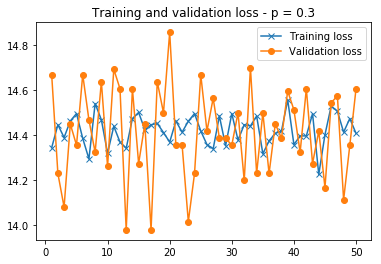

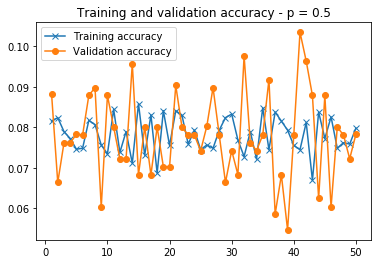

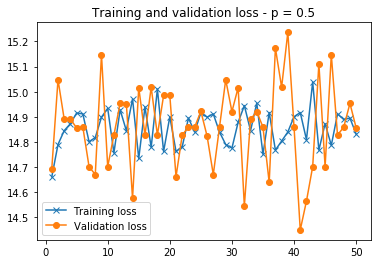

In [8]:
i = 0
for history in history_report:
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, label='Training accuracy', marker='x')
    plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
    plt.title('Training and validation accuracy - p = {}'.format(probs[i]))
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, label='Training loss', marker='x')
    plt.plot(epochs, val_loss, label='Validation loss', marker='o')
    plt.title('Training and validation loss - p = {}'.format(probs[i]))
    plt.legend()

    plt.show()
    i = i + 1